# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# **Reading File**

In [ ]:
df=pd.read_csv('car data.csv')

# **Exploring DataSet**

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# **Checking for Inconsistent Data**

*   Duplication
*   Null/Missing Values
*   Renaming Inconsistent Column Names















# Duplication

In [ ]:
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


# Null/Missing Values

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

# Renaming Inconsistent Column Names

In [ ]:
df= df.rename(columns={'Selling_type': 'Selling_Type', 'Owner':'No of Owners'})

# **Exploratory Data Analysis**


*   Visualizing Distributions
*   Visualizing Catagorigal Data



# Visualizing Distributions

In [ ]:
df['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

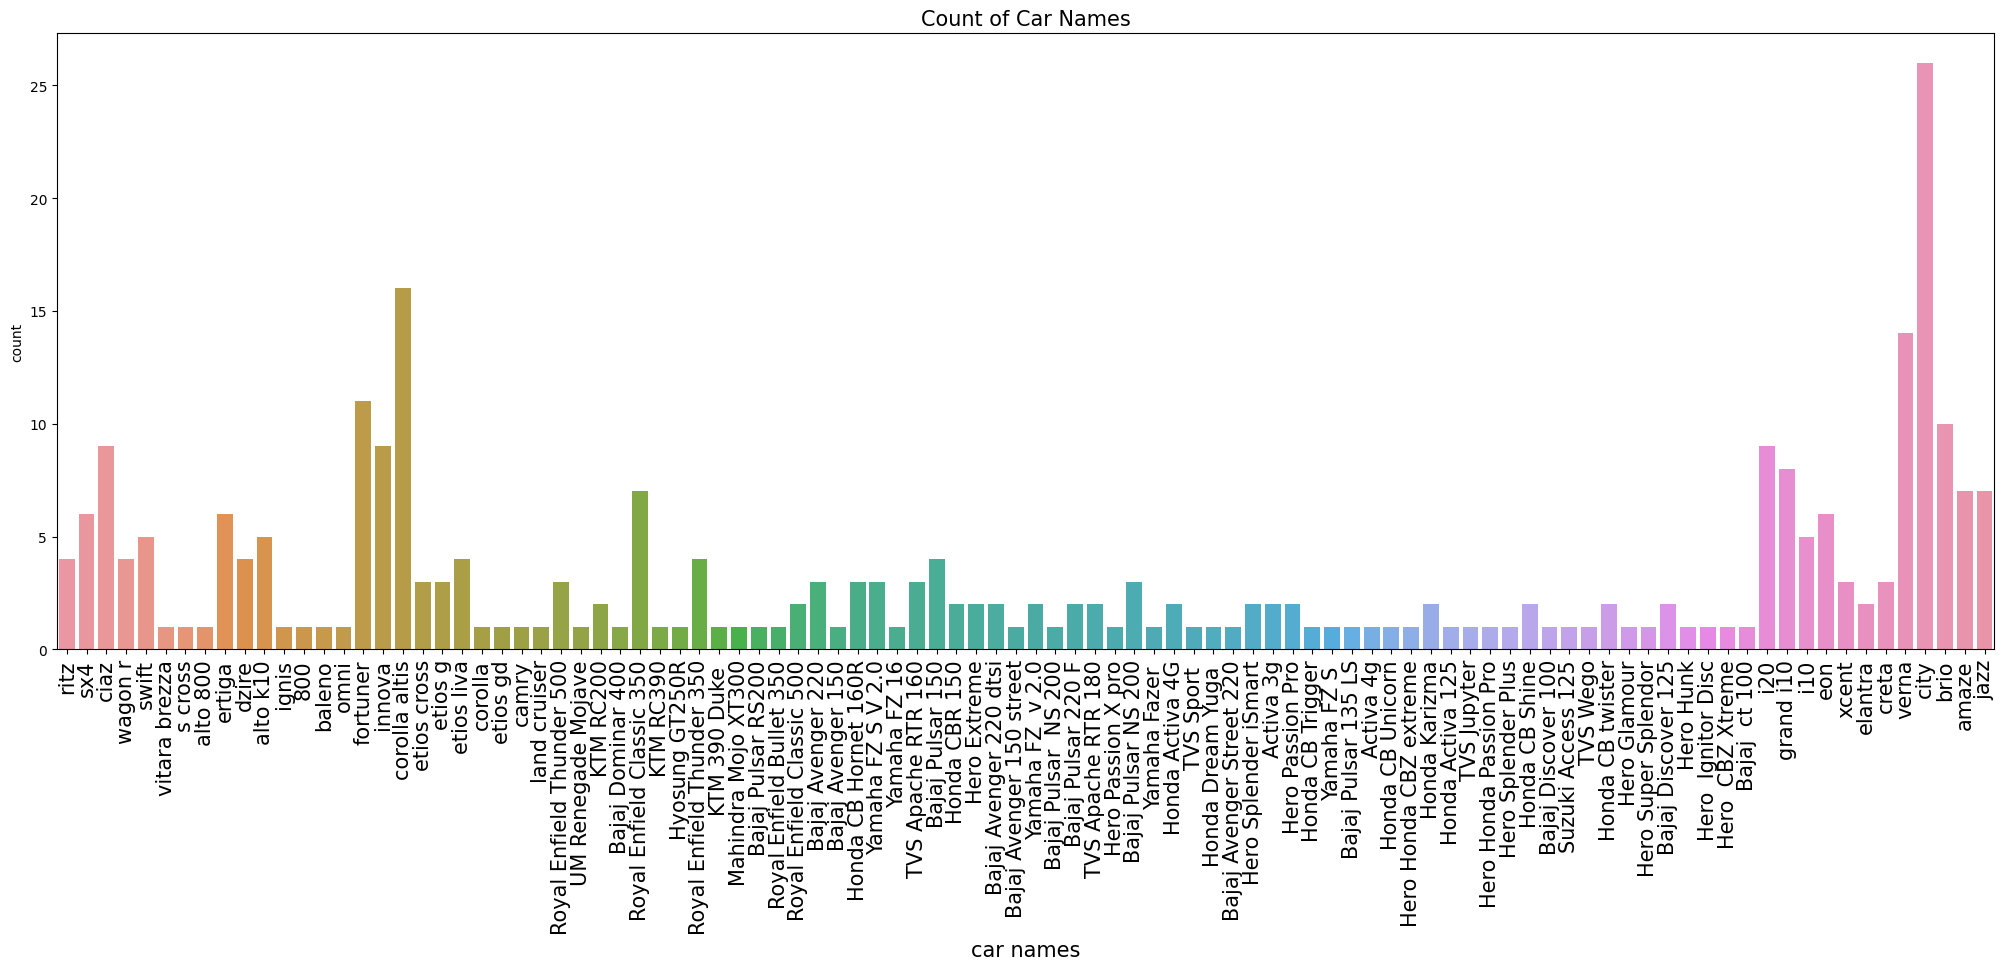

In [ ]:
plt.figure(figsize=(25, 8))
sns.countplot(x='Car_Name', data=df, width=0.8)
plt.xticks(rotation=90, fontsize=15)
plt.xlabel('car names',fontsize=15)
plt.title('Count of Car Names', fontsize=15)
plt.show()

*We can observe that car name City has the highest count *

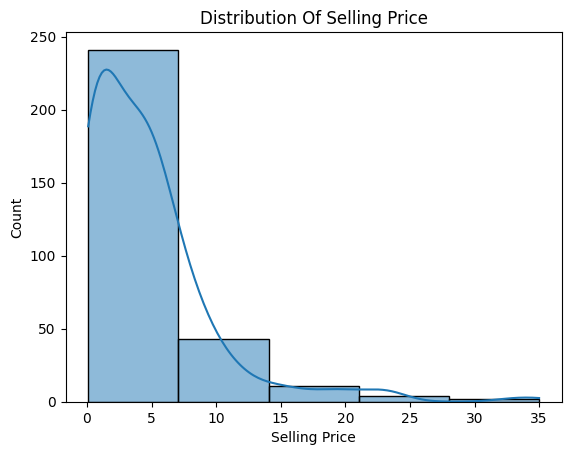

In [ ]:
# Distribution Of Selling Price

sns.histplot(x='Selling_Price', data=df, bins=5, kde=True)
plt.xlabel('Selling Price')
plt.title("Distribution Of Selling Price")


plt.show()


*Positively skewed Distribution*

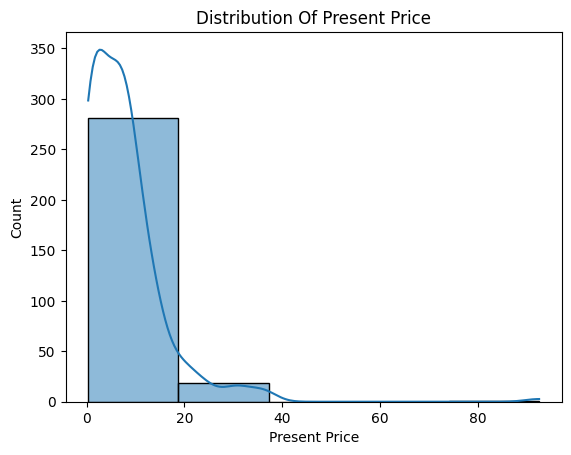

In [ ]:
# Distribution Of Present Price
sns.histplot(x='Present_Price', data=df, bins=5, kde=True)
plt.xlabel('Present Price')
plt.title("Distribution Of Present Price")


plt.show()


*Positively Skewed Distribution*

# Exploring Catagorical Data

In [ ]:
#Counting Instances
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

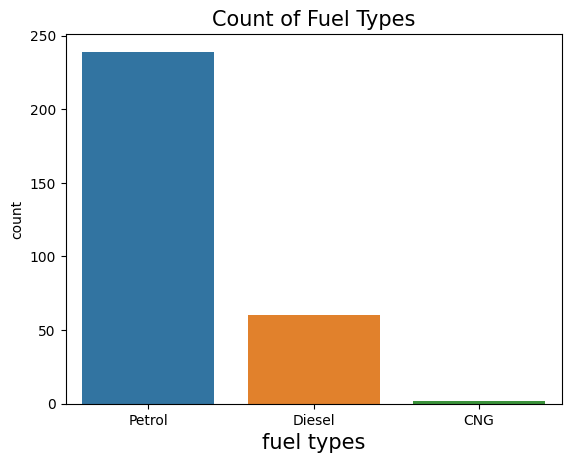

In [ ]:
#Visualizing
sns.countplot(x='Fuel_Type', data=df, width=0.8)
plt.xlabel('fuel types',fontsize=15)
plt.title('Count of Fuel Types', fontsize=15)
plt.show()

*We can observe that most of the cars available in our dataset consume Petrol as their fuel type*

In [ ]:
#Counting Instances
df['Selling_Type'].value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

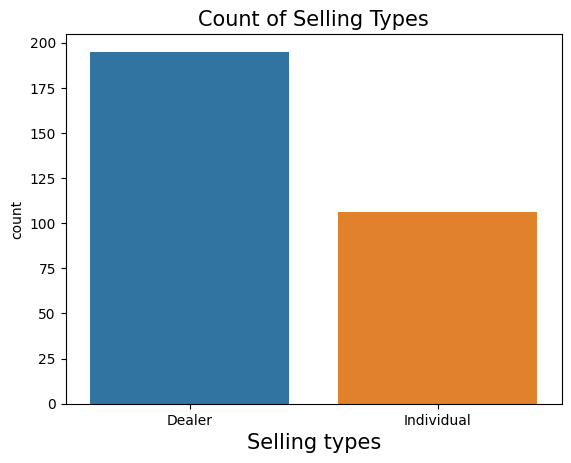

In [ ]:
#Visualizing
sns.countplot(x='Selling_Type', data=df, width=0.8)
plt.xlabel('Selling types',fontsize=15)
plt.title('Count of Selling Types', fontsize=15)
plt.show()

*Most of the cars in our dataset have Dealer as their selling type*

In [ ]:
#Counting Instances
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

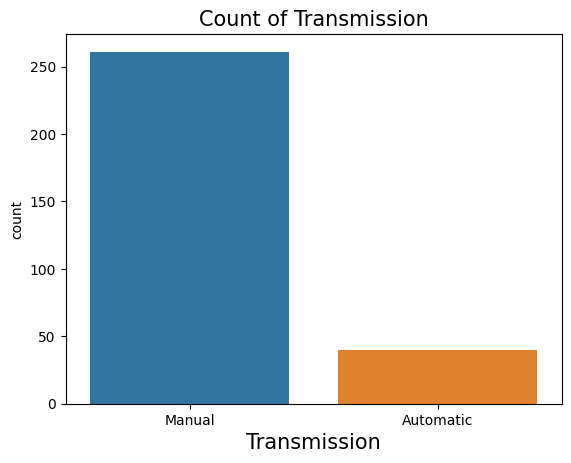

In [ ]:
#Visualizing
sns.countplot(x='Transmission', data=df, width=0.8)
plt.xlabel('Transmission',fontsize=15)
plt.title('Count of Transmission', fontsize=15)
plt.show()

*Most of the cars in our dataset have Manual Transmission*

In [ ]:
#Counting Instances

df['No of Owners'].value_counts()

0    290
1     10
3      1
Name: No of Owners, dtype: int64

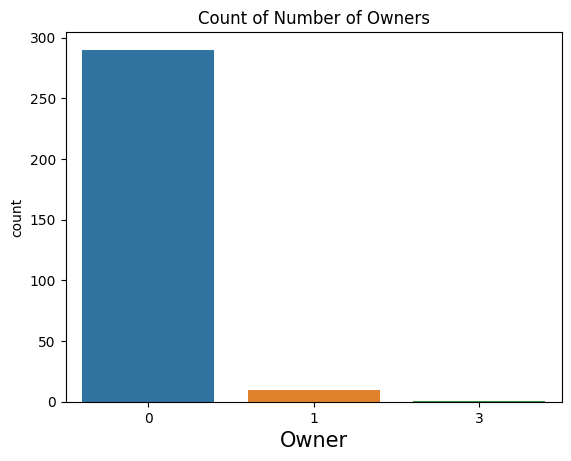

In [ ]:
#Visualizing
sns.countplot(x='No of Owners', data=df, width=0.8)
plt.xlabel('Owner',fontsize=15)
plt.title('Count of Number of Owners')
plt.show()

# **Label Encoding**


*   Transmission
*   Fuel_Type
*   Selling_Type




In [ ]:
#using label encoding for converting categories(character dtype) to numerical representation for making models models work on numerics only
#encoding categorical data
labelEncode=LabelEncoder()
df['Transmission']=labelEncode.fit_transform(df['Transmission'])
df['Fuel_Type']=labelEncode.fit_transform(df['Fuel_Type'])
df['Selling_Type']=labelEncode.fit_transform(df['Selling_Type'])



In [ ]:
df['Fuel_Type']

0      0
1      1
2      0
3      0
4      1
      ..
296    1
297    0
298    0
299    1
300    0
Name: Fuel_Type, Length: 301, dtype: int64

In [ ]:
df['Transmission']

0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    0
298    0
299    0
300    0
Name: Transmission, Length: 301, dtype: int64

In [ ]:
df['Selling_Type']

0      0
1      0
2      0
3      0
4      0
      ..
296    0
297    0
298    0
299    0
300    0
Name: Selling_Type, Length: 301, dtype: int64

# **Splitting Data**

In [ ]:
X=df.drop(columns=['Selling_Price', 'Car_Name'])
Y=df['Selling_Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10, random_state=2)

In [ ]:
X_test

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_Type,Transmission,No of Owners
99,2010,20.450,50024,1,0,0,0
161,2014,0.826,23000,0,1,0,0
89,2014,6.760,40000,0,0,0,0
30,2012,5.980,51439,1,0,0,0
232,2015,14.790,12900,0,0,1,0
290,2014,6.400,19000,0,0,0,0
35,2011,7.740,49998,2,0,0,0
7,2015,8.610,33429,1,0,0,0
183,2013,0.470,21000,0,1,0,0
13,2015,7.710,26000,0,0,0,0


In [ ]:
Y_test

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64

# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
predictions=model.predict(X_test)

In [ ]:
print("Accuracy: ",model.score(X_test,Y_test)*100)

Accuracy:  83.65861023210704


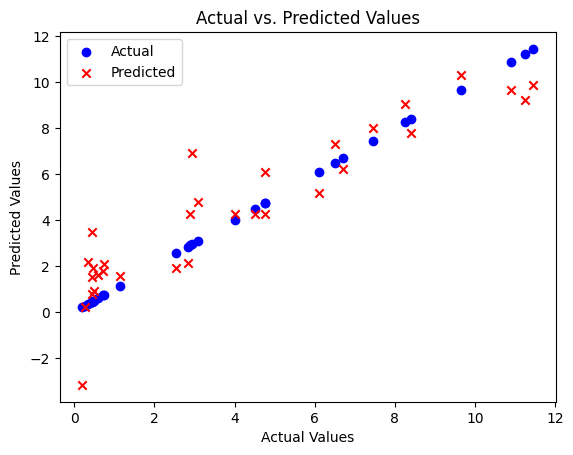

In [ ]:
actual_values = Y_test
predicted_values = predictions
# Plot actual values in blue
plt.scatter(Y_test, Y_test, color='blue', label='Actual', marker='o')

# Plot predicted values in red
plt.scatter(Y_test, predictions, color='red', label='Predicted', marker='x')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)

# Print the results
print("R-squared (R2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

R-squared (R2): 0.8365861023210703
Mean Absolute Error (MAE): 1.1514570443970626
Mean Squared Error (MSE): 2.1500058394846118
